In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fantineh/next-day-wildfire-spread
!unzip next-day-wildfire-spread.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/fantineh/next-day-wildfire-spread
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 2.07G/2.08G [00:43<00:00, 46.1MB/s]
100% 2.08G/2.08G [00:43<00:00, 51.0MB/s]
Archive:  next-day-wildfire-spread.zip
  inflating: next_day_wildfire_spread_eval_00.tfrecord  
  inflating: next_day_wildfire_spread_eval_01.tfrecord  
  inflating: next_day_wildfire_spread_test_00.tfrecord  
  inflating: next_day_wildfire_spread_test_01.tfrecord  
  inflating: next_day_wildfire_spread_train_00.tfrecord  
  inflating: next_day_wildfire_spread_train_01.tfrecord  
  inflating: next_day_wildfire_spread_train_02.tfrecord  
  inflating: next_day_wildfire_spread_train_03.tfrecord  
  inflating: next_day_wildfire_spread_train_04.tfrecord  
  inflating: next_day_wildfire_spread_train_05.tfrecord  
  inflating: next_day_wildfire_spread_train_06.tfrecord  
  inflating: next_day_wildfire_spread_train_07.tfrecord  
  inflating: next_da

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
tfrecord_file = 'next_day_wildfire_spread_train_00.tfrecord'

raw_dataset = tf.data.TFRecordDataset(tfrecord_file)
feature_description = {
    'temperature_max': tf.io.FixedLenFeature([], tf.float32),
    'temperature_min': tf.io.FixedLenFeature([], tf.float32),
    'humidity': tf.io.FixedLenFeature([], tf.float32),
    'wind_speed': tf.io.FixedLenFeature([], tf.float32),
    'ndvi': tf.io.FixedLenFeature([], tf.float32),
    'label': tf.io.FixedLenFeature([], tf.int64),
}

def _parse_function(example_proto):
    return tf.io.parse_single_example(example_proto, feature_description)

parsed_dataset = raw_dataset.map(_parse_function)


In [ ]:
raw_dataset = tf.data.TFRecordDataset('next_day_wildfire_spread_train_00.tfrecord')
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)


features {
  feature {
    key: "vs"
    value {
      float_list {
        value: 3.09265065
        value: 3.09214616
        value: 3.09214401
        value: 3.09262347
        value: 3.09356356
        value: 3.09494305
        value: 3.09674168
        value: 3.09893823
        value: 3.10151172
        value: 3.1044414
        value: 3.10770655
        value: 3.11128592
        value: 3.11515903
        value: 3.1193049
        value: 3.12370229
        value: 3.12833095
        value: 3.13316941
        value: 3.13819718
        value: 3.1436348
        value: 3.14995074
        value: 3.15706348
        value: 3.16487169
        value: 3.17327476
        value: 3.18217134
        value: 3.19146037
        value: 3.20104074
        value: 3.21081138
        value: 3.22067118
        value: 3.23051906
        value: 3.24025416
        value: 3.24977493
        value: 3.25898051
        value: 3.26776981
        value: 3.27604198
        value: 3.28369546
        value: 3.29062963

In [ ]:
import tensorflow as tf
raw_dataset = tf.data.TFRecordDataset('next_day_wildfire_spread_train_00.tfrecord')

for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    features = example.features.feature
    print("Detected Feature Keys:\n")
    for key in features:
        print(f"- {key}")


Detected Feature Keys:

- NDVI
- tmmn
- elevation
- population
- FireMask
- vs
- pdsi
- pr
- tmmx
- sph
- th
- PrevFireMask
- erc


In [ ]:
feature_description = {
    'NDVI': tf.io.VarLenFeature(tf.float32),
    'tmmn': tf.io.VarLenFeature(tf.float32),
    'tmmx': tf.io.VarLenFeature(tf.float32),
    'sph': tf.io.VarLenFeature(tf.float32),
    'vs': tf.io.VarLenFeature(tf.float32),
    'pdsi': tf.io.VarLenFeature(tf.float32),
    'pr': tf.io.VarLenFeature(tf.float32),
    'th': tf.io.VarLenFeature(tf.float32),
    'elevation': tf.io.VarLenFeature(tf.float32),
    'population': tf.io.VarLenFeature(tf.float32),
    'erc': tf.io.VarLenFeature(tf.float32),
    'PrevFireMask': tf.io.VarLenFeature(tf.float32),
    'FireMask': tf.io.VarLenFeature(tf.float32)
}


In [ ]:
def _parse_function(example_proto):
    parsed = tf.io.parse_single_example(example_proto, feature_description)
    parsed = {
        k: tf.sparse.to_dense(v, default_value=0.0)
        for k, v in parsed.items()
    }
    return parsed
parsed_dataset = tf.data.TFRecordDataset('next_day_wildfire_spread_train_00.tfrecord').map(_parse_function)
data = []
for parsed_record in parsed_dataset.take(2000):
    row = {}
    for key in parsed_record:
        value = parsed_record[key].numpy()
        if value.size == 1:
            row[key] = value.item()
        else:
            row[key] = value.tolist()[0]
    data.append(row)

import pandas as pd
df = pd.DataFrame(data)
df.head()


,FireMask,NDVI,PrevFireMask,elevation,erc,pdsi,population,pr,sph,th,tmmn,tmmx,vs
0,0.0,7071.0,0.0,92.0,21.491570,3.814566,19.675264,0.000000,0.004635,171.980377,276.290649,293.099457,3.092651
1,0.0,7071.0,0.0,92.0,24.094503,3.814566,19.675264,0.000000,0.005242,321.216797,276.739258,296.376251,3.352407
2,0.0,8510.0,0.0,92.0,18.980679,-2.030210,19.675264,0.000000,0.016533,52.808868,294.916870,305.603271,3.864761
3,0.0,8037.0,0.0,88.0,26.237402,-1.729348,1.476609,4.455243,0.009632,268.821930,284.987610,296.876495,4.239982
4,0.0,7524.0,0.0,88.0,23.355883,3.879025,1.476609,0.000000,0.005962,108.502563,276.611145,293.777649,4.353890


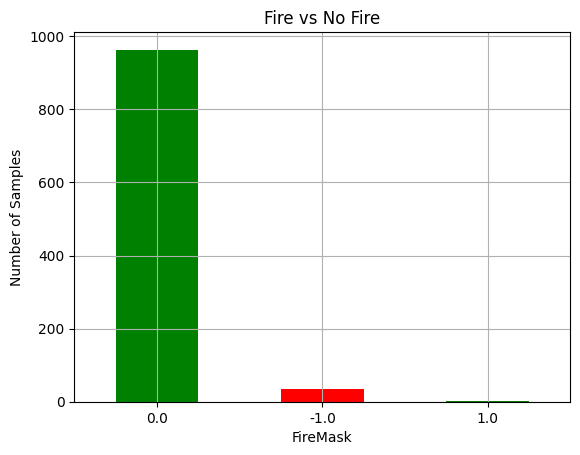

In [ ]:
import matplotlib.pyplot as plt

df['FireMask'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Fire vs No Fire')
plt.xlabel('FireMask')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


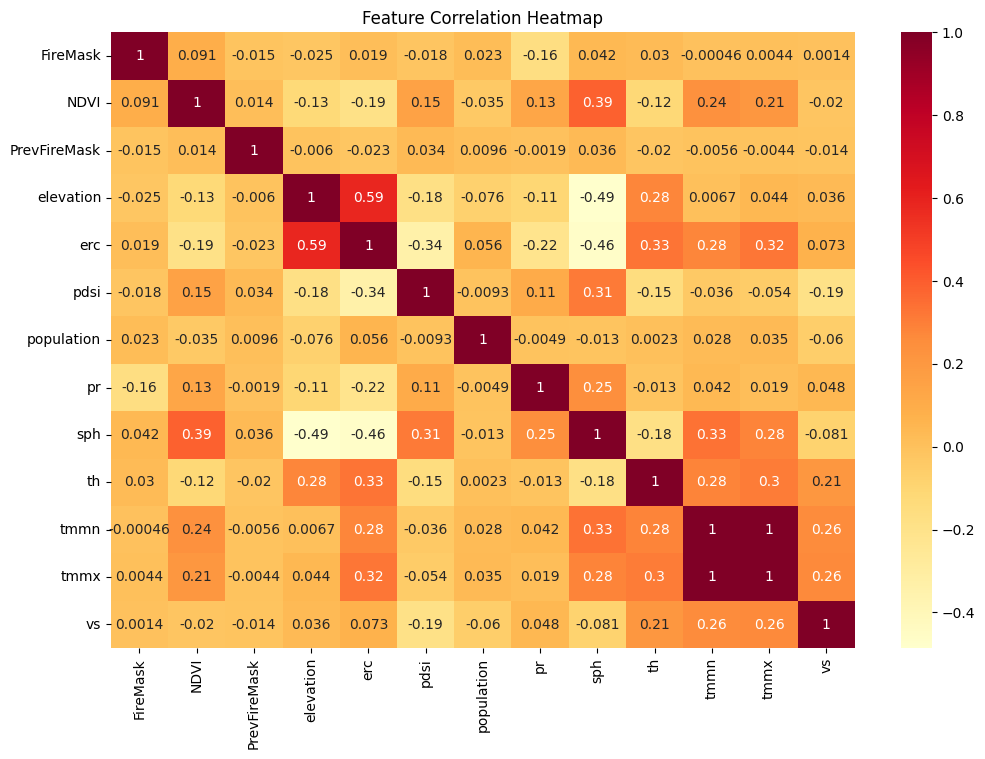

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')
plt.title("Feature Correlation Heatmap")
plt.show()


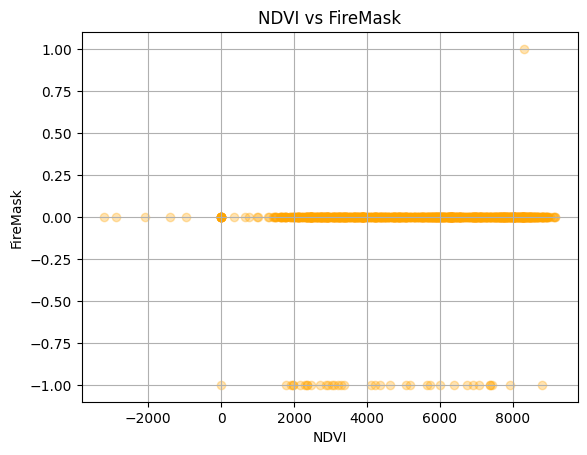

In [ ]:
plt.scatter(df['NDVI'], df['FireMask'], alpha=0.3, c='orange')
plt.title("NDVI vs FireMask")
plt.xlabel("NDVI")
plt.ylabel("FireMask")
plt.grid(True)
plt.show()


In [ ]:
print("🔥 Fire Label Distribution in Dataset:")
print(df['fire_label'].value_counts())


🔥 Fire Label Distribution in Dataset:
fire_label
0    999
1      1
Name: count, dtype: int64


In [ ]:
files = [
    'next_day_wildfire_spread_train_00.tfrecord',
    'next_day_wildfire_spread_train_01.tfrecord',
    'next_day_wildfire_spread_train_02.tfrecord',
    'next_day_wildfire_spread_train_03.tfrecord'
    
]

raw_dataset = tf.data.TFRecordDataset(files)

parsed_dataset = raw_dataset.map(_parse_function)


In [ ]:
data = []
for parsed_record in parsed_dataset.take(10000):  
    row = {}
    for key in parsed_record:
        value = parsed_record[key].numpy()
        row[key] = value.item() if value.size == 1 else value.tolist()[0]
    data.append(row)

df = pd.DataFrame(data)

df['fire_label'] = df['FireMask'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
df['fire_label'].value_counts()


,count
fire_label,
0,3993
1,7


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['FireMask', 'fire_label'], axis=1)
y = df['fire_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

print(model)


RandomForestClassifier(class_weight='balanced', random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
print(model)


RandomForestClassifier(class_weight='balanced', random_state=42)


In [39]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.utils import resample

df_majority = df[df['fire_label'] == 0]
df_minority = df[df['fire_label'] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])
df_balanced = df_balanced.sample(frac=1, random_state=42)

X = df_balanced.drop(['FireMask', 'fire_label'], axis=1)
y = df_balanced['fire_label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [42]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [43]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


[[799   0]
 [  0 799]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1598
   macro avg       1.00      1.00      1.00      1598
weighted avg       1.00      1.00      1.00      1598



In [ ]:
import joblib

joblib.dump(model, "fire_sentinel_model.pkl")

from google.colab import files
files.download("fire_sentinel_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>